# Определение перспективного тарифа для телеком компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент федерального оператора сотовой связи хочет понять, какой тариф приносит больше денег.  
    Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

**Тариф «Смарт»**

1.  Ежемесячная плата: 550 рублей
2.  Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.  Стоимость услуг сверх тарифного пакета:
    -   минута разговора: 3 рубля
    -   сообщение: 3 рубля
    -   1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

1.  Ежемесячная плата: 1950 рублей
2.  Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.  Стоимость услуг сверх тарифного пакета:
    -   минута разговора: 1 рубль
    -   сообщение: 1 рубль
    -   1 Гб интернет-трафика: 150 рублей

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats as st

sns.set_style("darkgrid")

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

### Шаг 2. Подготовьте данные

In [3]:
all_dfs = [calls, internet, messages, tariffs, users]

In [4]:
def get_info(df):
    display(df.head(3))
    print('***'*10)
    display(df.info())
    print('***'*20)

In [5]:
for i in all_dfs:
    get_info(i)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

************************************************************


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000


******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

************************************************************


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

************************************************************


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

************************************************************


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

************************************************************


Неправильный тип данных у дат. Ниже исправим это.  
Имеем пропуски значений в users.churn_date. Из описания задания это говорит о том, что договор действующий, то есть заполнять пропуски не нужно.

#### Приведите данные к нужным типам; найдите и исправьте ошибки в данных, если они есть.

Исправляем тип данных у дат.

In [6]:
def conv_to_date(df_col):  # почему то эта функция не отрабатывает должным образом, тип данных не меняется. Почему? 
    df_col = pd.to_datetime(df_col, format='%Y-%m-%d')
    

In [7]:
def conv_to_date(df, col): 
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')
    return df

Ну что же, будем менять тип столбцов без функции:

In [9]:
for df, col in zip((calls, internet, messages, users, users),
                  ('call_date', 'session_date', 'message_date', 'churn_date', 'reg_date')):
    conv_to_date(df, col)
    

In [10]:
#calls.info() # проверил, сработало ли.

#### количество сделанных звонков и израсходованных минут разговора по месяцам(Для каждого пользователя)

Добавим колонку со значением месяца и вспомним, что оператор округляет в большую сторону до минуты каждый звонок. Внесем соотв-щие изменения

In [11]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls['duration'] = calls['duration'].astype(int)

In [12]:
calls['month'] = calls['call_date'].dt.month
calls_temp = calls.merge(users, on='user_id', how='inner')
calls_temp.head(2) # посмотрим что получилось

,id,call_date,duration,user_id,month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000_0,2018-07-25,0,1000,7,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000_1,2018-08-17,0,1000,8,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [13]:
calls_month = calls_temp.pivot_table(index=['user_id', 'month'], 
                       aggfunc={'user_id': 'count', 'duration': 'sum'}).\
                        rename(columns={'user_id':'call_count'})
calls_month.head(10)

duration  call_count
user_id month                      
1000    5           159          22
        6           172          43
        7           340          47
        8           408          52
        9           466          58
        10          350          57
        11          338          43
        12          333          46
1001    11          430          59
        12          414          63

#### количество отправленных сообщений по месяцам


In [14]:
messages['month'] = messages['message_date'].dt.month
messages_temp = messages.merge(users, on='user_id', how='inner')
messages_month = messages_temp.pivot_table(index=['user_id', 'month'], 
                       aggfunc={'user_id': 'count'}).\
                        rename(columns={'user_id':'message_count'})
messages_month.head(10)

message_count
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
        10                73
        11                58
        12                70
1002    6                  4
        7                 11

#### объем израсходованного интернет-трафика по месяцам

In [15]:
internet.head(2)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000


In [16]:
internet['month'] = internet['session_date'].dt.month
internet_temp = internet.merge(users, on='user_id', how='inner')
internet_month = internet_temp.pivot_table(index=['user_id', 'month'], 
                       aggfunc={'mb_used': 'sum'}).\
                        rename(columns={'mb_used':'mb_total'})

Оператор округляет в конце месяца трафик, учтем это:

In [17]:
internet_month['mb_total'] = internet_month['mb_total'].apply(np.ceil)
internet_month

mb_total
user_id month          
1000    5        2254.0
        6       23234.0
        7       14004.0
        8       14056.0
        9       14569.0
...                 ...
1498    10      20580.0
1499    9        1846.0
        10      17789.0
        11      17964.0
        12      13056.0

[3203 rows x 1 columns]

In [18]:
internet_month['mb_total'] = internet_month['mb_total'].astype(int)

In [19]:
internet_month.head(10)

mb_total
user_id month          
1000    5          2254
        6         23234
        7         14004
        8         14056
        9         14569
        10        14703
        11        14757
        12         9818
1001    11        18430
        12        14037

In [20]:
print(calls_month.shape, messages_month.shape, internet_month.shape) # глянем на форму датафреймов

(3174, 2) (2717, 1) (3203, 1)


Ожидаемо размер таблиц различается: кто то из клиентов может  не звонить, не писать смс, не использовать интернет, в разных комбинациях. Будем использовать внешнее соединение, чтобы не потерять данные, там где будут пропуски в значения, позднее заполним их.

In [21]:
df = pd.merge(calls_month, messages_month, how='outer', 
                   left_on=['user_id', 'month'], right_on=['user_id', 'month'])
df = pd.merge(df, internet_month, how='outer',
                  left_on=['user_id', 'month'], right_on=['user_id', 'month']).reset_index() # и сбросим индекс
df = pd.merge(df, users[['user_id', 'tariff', 'city']], how='left',
                  left_on=['user_id'], right_on=['user_id'])
df.fillna(0, inplace=True)

In [22]:
df.head(20) # и что же у нас получилось?

,user_id,month,duration,call_count,message_count,mb_total,tariff,city
0,1000,5,159.0,22.0,22.0,2254.0,ultra,Краснодар
1,1000,6,172.0,43.0,60.0,23234.0,ultra,Краснодар
2,1000,7,340.0,47.0,75.0,14004.0,ultra,Краснодар
3,1000,8,408.0,52.0,81.0,14056.0,ultra,Краснодар
4,1000,9,466.0,58.0,57.0,14569.0,ultra,Краснодар
5,1000,10,350.0,57.0,73.0,14703.0,ultra,Краснодар
6,1000,11,338.0,43.0,58.0,14757.0,ultra,Краснодар
7,1000,12,333.0,46.0,70.0,9818.0,ultra,Краснодар
8,1001,11,430.0,59.0,0.0,18430.0,smart,Москва
9,1001,12,414.0,63.0,0.0,14037.0,smart,Москва


In [23]:
df.info() # уплыли типы некоторых столбцов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3214 non-null   int64  
 1   month          3214 non-null   int64  
 2   duration       3214 non-null   float64
 3   call_count     3214 non-null   float64
 4   message_count  3214 non-null   float64
 5   mb_total       3214 non-null   float64
 6   tariff         3214 non-null   object 
 7   city           3214 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 226.0+ KB


In [24]:
df.columns # чтобы скопипастить для цикла ниже

Index(['user_id', 'month', 'duration', 'call_count', 'message_count',
       'mb_total', 'tariff', 'city'],
      dtype='object')

In [25]:
for i in [ 'duration', 'call_count', 'message_count', 'mb_total']:
    df[i] = df[i].astype(int)

Функция для подчета затрат по пользователям по месяцам.

In [26]:
def calculate_month_pay(row):
    
    def get_over(cur, lim):
        return 0 if lim>=cur else cur-lim # внутрення функция для учета бесплатного пакета
    
    pay = 0
    
    if row.tariff == 'smart':
        pay += 550
        pay += get_over(row.duration, 500) * 3    
        pay += get_over(row.message_count, 50) *3
        pay += np.ceil(get_over(row.mb_total, 15*1024)/1024) * 200
    
    if row.tariff == 'ultra':
        pay += 1950
        pay += get_over(row.duration, 3000) * 1    
        pay += get_over(row.message_count, 1000) * 1
        pay += np.ceil(get_over(row.mb_total, 30*1024)/1024) * 150
    
    return pay

In [27]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [28]:
# код ревьюера

if row.tariff == 'smart':
        pay += tariffs.loc[0, 'rub_monthly_fee']
        pay += get_over(row.duration, tariffs.loc[0, 'minutes_included']) * tariffs.loc[0, 'rub_per_minute'] 
        pay += get_over(row.message_count, tariffs.loc[0, 'messages_included']) * tariffs.loc[0, 'rub_per_message']
        
# Соответсвенно, если тариф ультра, то индекс 0 меняется на 1

In [29]:
df['month_pay'] = df.apply(lambda x: calculate_month_pay(x), axis=1) # считаем затраты в отдельном столбце

In [30]:
df.head() 

,user_id,month,duration,call_count,message_count,mb_total,tariff,city,month_pay
0,1000,5,159,22,22,2254,ultra,Краснодар,1950.0
1,1000,6,172,43,60,23234,ultra,Краснодар,1950.0
2,1000,7,340,47,75,14004,ultra,Краснодар,1950.0
3,1000,8,408,52,81,14056,ultra,Краснодар,1950.0
4,1000,9,466,58,57,14569,ultra,Краснодар,1950.0


###  Проанализируйте данные  
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [31]:
distr = df.pivot_table(index=['tariff', 'month'], 
                          aggfunc={'duration':['mean', np.std, 'var'],
                                  'message_count': ['mean', np.std, 'var'],
                                  'mb_total': ['mean', np.std, 'var'],
                                  'month_pay':'mean'}
                      )
                          #rename(columns={'user_id':'call_count'})
distr.apply(np.floor)

duration                  mb_total                        \
                 mean    std       var     mean      std          var   
tariff month                                                            
smart  1        203.0  154.0   23787.0   8514.0   6444.0   41534011.0   
       2        298.0  190.0   36412.0  11597.0   6247.0   39029116.0   
       3        390.0  191.0   36823.0  15104.0   5828.0   33968406.0   
       4        367.0  186.0   34778.0  13462.0   5698.0   32469724.0   
       5        387.0  186.0   34820.0  15805.0   5978.0   35739600.0   
       6        395.0  175.0   30742.0  15795.0   5791.0   33537223.0   
       7        408.0  179.0   32250.0  15743.0   5897.0   34776835.0   
       8        421.0  186.0   34793.0  16611.0   5593.0   31287251.0   
       9        428.0  183.0   33535.0  16304.0   5196.0   26999781.0   
       10       426.0  188.0   35392.0  16757.0   5859.0   34332382.0   
       11       435.0  177.0   31605.0  16896.0   5340.0   28518716.0   
       12       478.0  199.0   39698.0  18114.0   5573.0   31065832.0   
ultra  1        428.0  269.0   72769.0  13141.0   6865.0   47135896.0   
       2        297.0  296.0   87919.0  11776.0  10644.0  113312128.0   
       3        489.0  333.0  111384.0  17536.0  10951.0  119943281.0   
       4        458.0  267.0   71653.0  16828.0   9718.0   94453559.0   
       5        510.0  289.0   83870.0  19363.0  10046.0  100924381.0   
       6        479.0  302.0   91535.0  18925.0   9292.0   86356960.0   
       7        545.0  307.0   94322.0  20496.0  10065.0  101308222.0   
       8        510.0  312.0   97956.0  19576.0  10476.0  109758874.0   
       9        539.0  325.0  105716.0  19204.0   9486.0   89986689.0   
       10       558.0  326.0  106464.0  20045.0   9803.0   96100672.0   
       11       541.0  310.0   96570.0  19787.0   9907.0   98159284.0   
       12       592.0  342.0  117276.0  21793.0  10378.0  107711871.0   

             message_count               month_pay  
                      mean   std     var      mean  
tariff month                                        
smart  1              18.0  16.0   262.0     721.0  
       2              24.0  21.0   473.0     827.0  
       3              31.0  26.0   718.0    1164.0  
       4              30.0  24.0   602.0     963.0  
       5              33.0  27.0   730.0    1197.0  
       6              33.0  28.0   806.0    1204.0  
       7              33.0  28.0   799.0    1223.0  
       8              33.0  28.0   838.0    1320.0  
       9              33.0  28.0   790.0    1249.0  
       10             33.0  28.0   816.0    1364.0  
       11             34.0  28.0   805.0    1343.0  
       12             35.0  30.0   934.0    1578.0  
ultra  1              33.0  30.0   940.0    1950.0  
       2              21.0  26.0   716.0    1975.0  
       3              32.0  41.0  1732.0    2014.0  
       4              31.0  37.0  1407.0    2001.0  
       5              37.0  40.0  1624.0    2059.0  
       6              41.0  44.0  1986.0    2039.0  
       7              49.0  48.0  2372.0    2118.0  
       8              48.0  46.0  2171.0    2083.0  
       9              52.0  46.0  2152.0    2024.0  
       10             58.0  51.0  2697.0    2065.0  
       11             55.0  49.0  2476.0    2092.0  
       12             60.0  51.0  2681.0    2138.0

In [32]:
distr_mean = df.pivot_table(index=['tariff', 'month'], 
                            aggfunc={'duration':'mean',
                                  'message_count': 'mean',
                                  'mb_total': 'mean',
                                  'month_pay':'mean'}
                      )
                    
distr_mean.apply(np.floor)

duration  mb_total  message_count  month_pay
tariff month                                              
smart  1         203.0    8514.0           18.0      721.0
       2         298.0   11597.0           24.0      827.0
       3         390.0   15104.0           31.0     1164.0
       4         367.0   13462.0           30.0      963.0
       5         387.0   15805.0           33.0     1197.0
       6         395.0   15795.0           33.0     1204.0
       7         408.0   15743.0           33.0     1223.0
       8         421.0   16611.0           33.0     1320.0
       9         428.0   16304.0           33.0     1249.0
       10        426.0   16757.0           33.0     1364.0
       11        435.0   16896.0           34.0     1343.0
       12        478.0   18114.0           35.0     1578.0
ultra  1         428.0   13141.0           33.0     1950.0
       2         297.0   11776.0           21.0     1975.0
       3         489.0   17536.0           32.0     2014.0
       4         458.0   16828.0           31.0     2001.0
       5         510.0   19363.0           37.0     2059.0
       6         479.0   18925.0           41.0     2039.0
       7         545.0   20496.0           49.0     2118.0
       8         510.0   19576.0           48.0     2083.0
       9         539.0   19204.0           52.0     2024.0
       10        558.0   20045.0           58.0     2065.0
       11        541.0   19787.0           55.0     2092.0
       12        592.0   21793.0           60.0     2138.0

По средним значениям можно сделать следующие выводы: на тарифе "смарт" начиная с марта виден перерасход по всем параметрам, но перерасходы в оплате видны за весь год. Явная категория перерасхода - минуты разговоров. Интернет и смс-ки сверх лимита расходуют не так сильно. Видно что в декабре расходы приближаются к тарифу "ультра" и превышают стоимость пакета в 3 раза.
На тарифе "ультра" абоненты явно не выбирают лимиты пакета, но некоторые пользователи, все же делают перерасход, за счет этого мы видим, что средние расходы выше стоимости пакета. В целом эти отклонения невелики. 
В декабре видим максимальные показатели потребления, перерасходов и соотв-но начислений.

In [33]:
# код ревьюера

(
    df
    .groupby('tariff')['duration', 'message_count', 'mb_total', 'month_pay']
    .agg(['mean', 'median', 'var', 'std'])
    .T
    .round()
)
# не обращай внимания на ошибку

/tmp/ipykernel_68/4211143422.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df


tariff                     smart        ultra
duration      mean         418.0        527.0
              median       422.0        518.0
              var        36219.0     100874.0
              std          190.0        318.0
message_count mean          33.0         49.0
              median        28.0         38.0
              var          797.0       2285.0
              std           28.0         48.0
mb_total      mean       16209.0      19469.0
              median     16507.0      19309.0
              var     34462563.0  101751558.0
              std         5870.0      10087.0
month_pay     mean        1290.0       2070.0
              median      1023.0       1950.0
              var       669786.0     141517.0
              std          818.0        376.0

In [34]:
df.columns

Index(['user_id', 'month', 'duration', 'call_count', 'message_count',
       'mb_total', 'tariff', 'city', 'month_pay'],
      dtype='object')

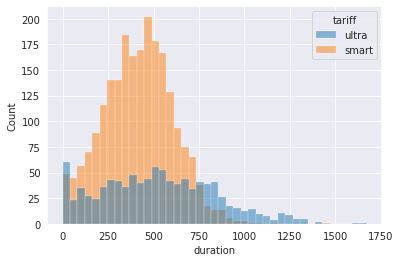

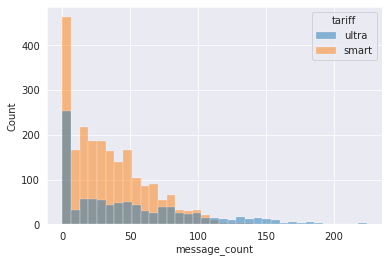

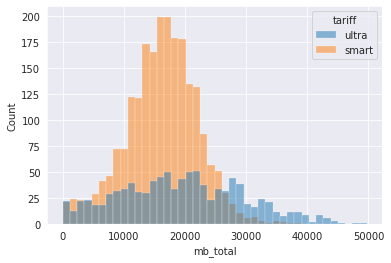

In [35]:
for col in ['duration', 'message_count', 'mb_total']:
    sns.histplot(data=df, x=col, hue='tariff',  linewidth=.2)
    plt.show()

In [36]:
pay_mean_all = df.pivot_table(index=['tariff' ], 
                          aggfunc={'month_pay':['mean', 'median', 'sum']}
                             )
pay_mean_all

month_pay                   
               mean  median        sum
tariff                                
smart   1289.973531  1023.0  2875351.0
ultra   2070.152284  1950.0  2039100.0

In [37]:
users_per_tariff = df.pivot_table(index=['tariff' ], 
                          aggfunc={'user_id':'count'}
                                 )
users_per_tariff

,user_id
tariff,
smart,2229
ultra,985


Основные выводы: т.к. пользователей тарифа "Ультра" меньше, имеем более "низкое" распределение. 

Пользователи тарифа "Ультра" реже выходят за лимиты стоимости пакета (медиана = 1950), в то время как у "Смарт" - перерасходы более частые.  

Распределение у тарифа "Ультра" имеет более длинный хвост справа (дисперсия выше), т.к. абоненты имеют больший пакет и соотвестнно чаще выходят на повешенное потребление.Заметно, что в пользователи "Смарт", имея ограниченность в пакете и стараясь не превышать лимиты,  максимально приближаются к лимиту пакета минут, часто укладываются в лимит пакета СМС, и часто незначительно превышают лимит пакета интернета.  
У тарифа "Ультра" пользователи даже близко не расходуют пакет минут, не часто расходую пакет СМС, но некоторые и расходуют больше, и также чаще не превышают лимит пакета Интернета. Неплохим рекламным ходом, возможно, было бы еще большее увеличение пакета минут(его все равно никто не расходует должным образом).

<b>Средняя прибыль от пользователя тарифа "Ультра" - выше, при этом в выборке оказалось более чем в два раза меньше таких абонентов. А общая прибыль от абонентов "Смарт" - больше почти на треть.
Итог: "Мегалайну" стоит сосредоточится на рекламной акции тарифа "Ультра" и привлечь большее количество его пользователей.




### Проверьте гипотезы
Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

#### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем нулевую и альтернативную гипотезу.

$H_0 $ — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

$H_1 $ — средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [38]:
ultra = df.query('tariff == "ultra"')['month_pay']
smart = df.query('tariff == "smart"')['month_pay']

alpha = .01

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Без сомнений (значение значительно меньше alpha) отвегаем нулевую гипотезу.

Ранее, мы получили среднее и медианные значения прибыли по тарифам, тариф "Ультра" больше почти в 2 раза.  
<b>Вывод: с уверенностью 99% средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

#### средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сформулируем гипотезы.

$H_0 $ — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

$H_1 $ — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

In [39]:
msk_users = df.query('city == "Москва"')
ather_users = df.query('city != "Москва"')

alpha = .1

results = st.ttest_ind(
    msk_users['month_pay'], 
    ather_users['month_pay'], 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


In [40]:
msk_users.pivot_table(index='tariff', aggfunc={'month_pay':'mean'}) # посмотрим среднюю выручку по тарифам в Москве

,month_pay
tariff,
smart,1239.357513
ultra,2074.000000


In [44]:
ather_users.pivot_table(index='tariff', aggfunc={'month_pay':'mean'}) # посмотрим среднюю выручку по другим городам

,month_pay
tariff,
smart,1300.574607
ultra,2069.013158


Да, действительно, показатели почти равны.

<b>Вывод: гипотезу о том, что доходы от пользователей из Москвы и из других регионов равны отвергнуть не удалось. 

Если бы мы отклонили нулевую гипотезу, вероятность ошибиться составила бы 50.3%.

### Напишите общий вывод

<b>В ходе проекта мы импортировали данные: исправлены типы переменных столбцов, произведено объеденение таблиц, сформировано множество сводных таблиц, составлены гистрограммы, проверены две гипотезы.

Из анализа гистограмм были сделаны выводы:
По средним значениям можно сделать следующие выводы: на тарифе "смарт" начиная с марта виден перерасход по всем параметрам, но перерасходы в оплате видны за весь год. Явная категория перерасхода - минуты разговоров. Интернет и смс-ки сверх лимита расходуют не так сильно. Видно что в декабре расходы приближаются к тарифу "ультра" и превышают стоимость пакета в 3 раза.

Общий вывод: <b>Средняя прибыль от пользователя тарифа "Ультра" - выше, при этом в выборке оказалось более чем в два раза меньше таких абонентов. А общая прибыль от абонентов "Смарт" - больше почти на треть.
Итог: "Мегалайну" стоит сосредоточится на рекламной акции тарифа "Ультра" и привлечь большее количество его пользователей.
На тарифе "ультра" абоненты явно не выбирают лимиты пакета, но некоторые пользователи, все же делают перерасход, за счет этого мы видим, что средние расходы выше стоимости пакета. В целом эти отклонения невелики. 
В декабре видим максимальные показатели потребления, перерасходов и соотв-но начислений.  

    
Были проверены две гипотезы:
Результат первой: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. 
Результат второй:  гипотезу о том, что доходы от пользователей из Москвы и из других регионов равны отвергнуть не удалось.